In [1]:
import numpy as np
from sklearn import cluster, datasets
from scipy import misc
import matplotlib.pyplot as plt

/home/local/SIRIONLABS/nikhil.bansal/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/local/SIRIONLABS/nikhil.bansal/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/local/SIRIONLABS/nikhil.bansal/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/local/SIRIONLABS/nikhil.bansal/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/local/SIRIONLA

In [3]:
img = misc.face(gray=True)

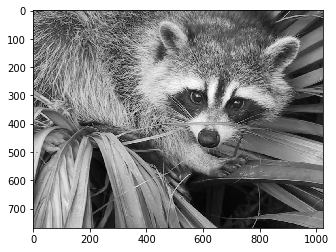

In [5]:
plt.imshow(img,cmap = plt.cm.gray)

In [7]:
img.shape

(768, 1024)

In [9]:
img

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

Text(0.5, 0, 'number of components')

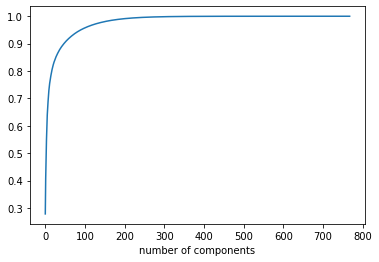

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
p_img = pca.fit_transform(img)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")

In [17]:
pca = PCA(n_components=100)
p_img = pca.fit_transform(img)


In [18]:
p_img.shape

(768, 100)

In [42]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=1,min_samples=5)
data = model.fit_predict(img)


In [43]:
labels = model.labels_
clusters = len(set(labels))-(1 if -1 in set(labels) else 0)

In [44]:
clusters

0

In [53]:
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import *
ds = cdist(img,img)
ln = linkage(ds,method="single")

/home/local/SIRIONLABS/nikhil.bansal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


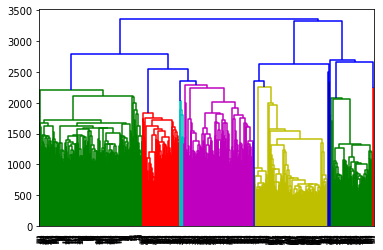

In [54]:
_=dendrogram(ln)

In [45]:
from sklearn.cluster import AgglomerativeClustering

model2 = AgglomerativeClustering(n_clusters=5)
y = model2.fit_predict(img)


/home/local/SIRIONLABS/nikhil.bansal/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


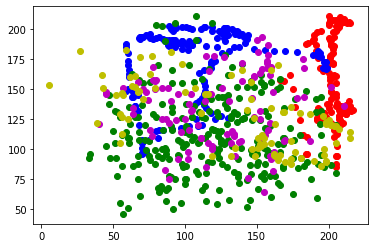

In [50]:
plt.plot(img[y==0][:,0],img[y==0][:,100],'ro')
plt.plot(img[y==1][:,0],img[y==1][:,100],'bo')
plt.plot(img[y==2][:,0],img[y==2][:,100],'go')
plt.plot(img[y==3][:,0],img[y==3][:,100],'mo')
plt.plot(img[y==4][:,0],img[y==4][:,100],'yo')

In [51]:
# Kmeans

Text(0, 0.5, 'wcss')

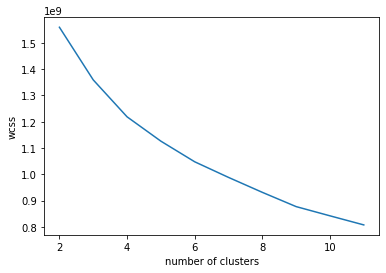

In [55]:
from sklearn.cluster import KMeans
wcss =[]
for i in range(2,12):
    model3 = KMeans(n_clusters=i)
    model3.fit(img)
    wcss.append(model3.inertia_)

plt.plot(range(2,12),wcss)
plt.xlabel("number of clusters")
plt.ylabel("wcss")

In [56]:
model_kmean = KMeans(n_clusters=5)
y = model_kmean.fit_predict(img)

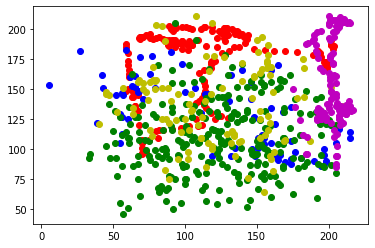

In [57]:
plt.plot(img[y==0][:,0],img[y==0][:,100],'ro')
plt.plot(img[y==1][:,0],img[y==1][:,100],'bo')
plt.plot(img[y==2][:,0],img[y==2][:,100],'go')
plt.plot(img[y==3][:,0],img[y==3][:,100],'yo')
plt.plot(img[y==4][:,0],img[y==4][:,100],'mo')